<a href="https://colab.research.google.com/github/GianLucas96/Lucas-Cerquera/blob/master/Copia_de_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APLICAIÓN DE PCA A DATOS DE ANALISIS DE VELOCIDAD EN LA MARCHA Y POSTERIOR CLASIFICACION BINARIA Y MULTICLASS

###### LUCAS CERQUERA Y JUAN MARRUGO

### Se desea clasificar las diferentes velocidades que se presentan en los datos mcc3 de analisis de la marcha de Ferrani, donde se analisaran los agulos de rotacion, fuerzas de reacción, momentos y poder.



###Empezamos cargando y replicando los datos para 40 sujetos, 20 jovenes y 20 viejos:

In [46]:
pip install mglearn

In [0]:
import gspread, sklearn, mglearn, time, pandas as pd, numpy as np, scipy as sc
import matplotlib.pyplot as plt
from oauth2client.client import GoogleCredentials
from google.colab import auth
from sklearn.decomposition import PCA
from IPython.display import clear_output

# Autoriza Drive_BETA
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

### ¡Aquí! Almaceno toda la informacion del GoogleSheet < mmc3 > en una sola variable diccionario < dcc >


In [48]:
# Creamos la variable diccionario
sh = gc.open('mmc3') # Abro GoogleSheet < mmc3 >
#···············································································
wk_lista = sh.worksheets()                                           # Variables
dcc , dcc_art = {} , {}
ndatos = 101              # numeros de frames en este caso de 0-100 = 101 datos
target_colum = ['% Gait Cycle', 
                'joven_Natural-',   'joven_Natural',   'joven_Natural+', 
                'joven_XS-',        'joven_XS',        'joven_XS+', 
                'joven_S-',         'joven_S',         'joven_S+', 
                'joven_M-',         'joven_M',         'joven_M+', 
                'joven_L-',         'joven_L',         'joven_L+', 
                'joven_Toe-',       'joven_Toe',       'joven_Toe+', 
                'joven_Heel-',      'joven_Heel',      'joven_Heel+', 
                'joven_Ascending-', 'joven_Ascending', 'joven_Ascending+', 
                'joven_Descending-','joven_Descending','joven_Descending+',
                'viejo_Natural-',   'viejo_Natural',   'viejo_Natural+', 
                'viejo_XS-',        'viejo_XS',        'viejo_XS+', 
                'viejo_S-',         'viejo_S',         'viejo_S+', 
                'viejo_M-',         'viejo_M',         'viejo_M+', 
                'viejo_L-',         'viejo_L',         'viejo_L+', 
                'viejo_Toe-',       'viejo_Toe',       'viejo_Toe+', 
                'viejo_Heel-',      'viejo_Heel',      'viejo_Heel+', 
                'viejo_Ascending-', 'viejo_Ascending', 'viejo_Ascending+', 
                'viejo_Descending-','viejo_Descending','viejo_Descending+']
#···············································································
for i in range(1,5):                           # Nombre de las pestañas del mmc3
  _art_ = []
  wk = sh.worksheet(wk_lista[i].title)  
  rw = np.array(wk.get_all_values())
  k  = ""
  dcc[str(wk_lista[i].title)] = {}
  _f1 = 1                   # fila de inicio por articulacion
  _f2 = 102                 # fila final de articulacion 
  iii = 0
  dcc_art = {}
  for ii in range(1,rw[:,0].shape[0]):  # Nombre de las articulaciones del sheet
    j = str(rw[ii,0]) # nombre de la articulacion
    if str(k) == str(j): # cambio de nombre
      j = j
    else:
      _art_.append(j)
      if iii > 0:
        _f1 = (101 * iii) + 1                  # fila de inicio por articulacion
        _f2 = _f1 + 101                             # fila final de articulacion
      tabla = pd.DataFrame(rw[_f1:_f2,1::])
      tabla.columns = target_colum
      dcc_art[str(j)] = tabla
      dcc[str(wk_lista[i].title)] = dcc_art
      iii = iii + 1
    k = j 
pd.DataFrame(dcc)

,Joint Rotations,Ground Reaction Forces,Joint Moments,Joint Power
Pelvic Ant/Posterior Tilt,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Pelvic Up/Down Obliquity,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Pelvic Int/External Rotation,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Hip Flex/Extension,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Hip Ad/Abduction,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Hip Int/External Rotation,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Knee Flex/Extension,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Ankle Dorsi/Plantarflexion,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,% Gait Cycle joven_Natural- ... viejo_Des...,NaN
Thigh Flex/Extension,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Thigh Ad/Abduction,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN


## Función de realizar numeros aleatorios con una media y una desviacion estandar especifica


In [0]:
# PROCESO DE GENERAR NUMEROS ALEATORIOS CON PROMEDIO Y DESVIACION ESTANDAR 
# DESEADOS
#···············································································
num_samples     = 20     # Numero de numeros aleatorios a generar
desired_mean    = -2.8   # promedio de numeros aleatorios
desired_std_dev = 8.9    # Desviacion estandar a numeros aleatorios a generar
#···············································································
# Funcion de variables aleatorias con media y desviacion estandar
def var_alea (num_samples,desired_mean,desired_std_dev):
  samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)
  actual_mean = np.mean(samples)
  actual_std = np.std(samples)
  #print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".
  #      format(actual_mean, actual_std))
  zero_mean_samples = samples - (actual_mean)
  zero_mean_mean = np.mean(zero_mean_samples)
  zero_mean_std = np.std(zero_mean_samples)
  #print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".
  #      format(zero_mean_mean, zero_mean_std))
  scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
  scaled_mean = np.mean(scaled_samples)
  scaled_std = np.std(scaled_samples)
  #print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".
  #      format(scaled_mean, scaled_std))
  final_samples = scaled_samples + desired_mean
  final_mean = np.mean(final_samples)
  final_std = np.std(final_samples)
  #print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".
  #      format(final_mean, final_std))
  #print(final_samples)
  return(final_samples)

### ¡Aquí! Se vuelve una tabla en 20 tablas que almacena las variables tanto de jovenes como las de viejos de los targets < "Natural","XS","S","M","L","Toe","Heel","Ascending","Descending" > con media y desviacion dada:

#### 1) la media es el valor medio de cada target
#### 2) la desviacion estandar es la suma de los valores absolutos de la desviacion estandar positima mas la negativa.



In [0]:
#···············································································
# Variables diccionario de las tablas de 20 personas para jovenes y adultas
per = [""   ,"p1" ,"p2" ,"p3" ,"p4" ,"p5" ,"p6" ,"p7" ,"p8" ,"p9" ,"p10",
       "p11","p12","p13","p14","p15","p16","p17","p18","p19","p20"]
personas= {per[1]:[] ,per[2]:[] ,per[3]:[] ,per[4]:[] ,per[5] :[],
           per[6]:[] ,per[7]:[] ,per[8]:[] ,per[9]:[] ,per[10]:[],
           per[11]:[],per[12]:[],per[13]:[],per[14]:[],per[15]:[],
           per[16]:[],per[17]:[],per[18]:[],per[19]:[],per[20]:[]}
target_colum_ = ['% Gait Cycle','joven_Natural','joven_XS',
                 'joven_S','joven_M','joven_L','joven_Toe','joven_Heel', 
                 'joven_Ascending','joven_Descending','viejo_Natural',
                 'viejo_XS','viejo_S','viejo_M','viejo_L','viejo_Toe',
                 'viejo_Heel','viejo_Ascending','viejo_Descending']
for i in range(1,21):
  personas[per[i]] = pd.DataFrame(np.zeros((101,19)))
  personas[per[i]].columns = target_colum_
#···············································································

In [0]:
#···············································································
__tabla_art = {}
for i in range(1,5):                           # Nombre de las pestañas del mmc3
  __art_ = {}
  wk = sh.worksheet(wk_lista[i].title)  
  rw = np.array(wk.get_all_values())
  for ii in range(1,rw[:,0].shape[0]):  # Nombre de las articulaciones del sheet
    j = str(rw[ii,0]) # nombre de la articulacion
    if str(k) == str(j): # cambio de nombre
      j = j
    else:
      __art_[str(j)] = {}
      #__art_.append(j)
    k = j
  if i == 1: __tabla_art[str(wk_lista[i].title)] = __art_ 
  if i == 2: __tabla_art[str(wk_lista[i].title)] = __art_
  if i == 3: __tabla_art[str(wk_lista[i].title)] = __art_
  if i == 4: __tabla_art[str(wk_lista[i].title)] = __art_
#···············································································

In [53]:
xxx = 0 
for ii in range(1,5):
  _sheet = str(wk_lista[ii].title)
  for i in range(pd.DataFrame(__tabla_art[_sheet]).shape[1]):
    _artic = list(__tabla_art[_sheet])[i]
    j_v = ["joven","viejo"]            # Lleno las distinatas tablas de personas
    tag = ["Natural","XS","S","M","L","Toe","Heel","Ascending","Descending"]
    # Armar el tag
    for _j_v in j_v:
      xxx = 0
      for _tag in tag:
        vari = _j_v+"_"+_tag
        xxx = xxx + 1
        print(_sheet + " => " + _artic + "=>" + str(xxx))
        for m in range(dcc[_sheet][_artic].shape[0]):
          mean = dcc[_sheet ][_artic][vari][i]
          _mas = dcc[_sheet ][_artic][vari+"+"][i]
          _men = dcc[_sheet ][_artic][vari+"-"][i]
          DE   = abs(float(_mas))+abs(float(_men))
          NP   = pd.DataFrame(per).shape[0]-1 # numero de personas    
          num_gener = var_alea(NP,float(mean),DE)# genero los numeros aleatorios
          # Comprovamos valores demedia y desviacion estandar
          media = np.mean(num_gener)
          DEE = np.std(num_gener)
          for _per in range(1,pd.DataFrame(per).shape[0]):
            personas[per[_per]][vari][m] = num_gener[_per-1]
            __tabla_art[_sheet][_artic] = personas

Joint Rotations => Pelvic Ant/Posterior Tilt=>1
Joint Rotations => Pelvic Ant/Posterior Tilt=>2
Joint Rotations => Pelvic Ant/Posterior Tilt=>3
Joint Rotations => Pelvic Ant/Posterior Tilt=>4
Joint Rotations => Pelvic Ant/Posterior Tilt=>5
Joint Rotations => Pelvic Ant/Posterior Tilt=>6
Joint Rotations => Pelvic Ant/Posterior Tilt=>7
Joint Rotations => Pelvic Ant/Posterior Tilt=>8
Joint Rotations => Pelvic Ant/Posterior Tilt=>9
Joint Rotations => Pelvic Ant/Posterior Tilt=>1
Joint Rotations => Pelvic Ant/Posterior Tilt=>2
Joint Rotations => Pelvic Ant/Posterior Tilt=>3
Joint Rotations => Pelvic Ant/Posterior Tilt=>4
Joint Rotations => Pelvic Ant/Posterior Tilt=>5
Joint Rotations => Pelvic Ant/Posterior Tilt=>6
Joint Rotations => Pelvic Ant/Posterior Tilt=>7
Joint Rotations => Pelvic Ant/Posterior Tilt=>8
Joint Rotations => Pelvic Ant/Posterior Tilt=>9
Joint Rotations => Pelvic Up/Down Obliquity=>1
Joint Rotations => Pelvic Up/Down Obliquity=>2
Joint Rotations => Pelvic Up/Down Obliquit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


Ground Reaction Forces => Anterior/Posterior=>3
Ground Reaction Forces => Anterior/Posterior=>4
Ground Reaction Forces => Anterior/Posterior=>5
Ground Reaction Forces => Anterior/Posterior=>6
Ground Reaction Forces => Anterior/Posterior=>7
Ground Reaction Forces => Anterior/Posterior=>8
Ground Reaction Forces => Anterior/Posterior=>9
Ground Reaction Forces => Anterior/Posterior=>1
Ground Reaction Forces => Anterior/Posterior=>2
Ground Reaction Forces => Anterior/Posterior=>3
Ground Reaction Forces => Anterior/Posterior=>4
Ground Reaction Forces => Anterior/Posterior=>5
Ground Reaction Forces => Anterior/Posterior=>6
Ground Reaction Forces => Anterior/Posterior=>7
Ground Reaction Forces => Anterior/Posterior=>8
Ground Reaction Forces => Anterior/Posterior=>9
Ground Reaction Forces => Medio/Lateral=>1
Ground Reaction Forces => Medio/Lateral=>2
Ground Reaction Forces => Medio/Lateral=>3
Ground Reaction Forces => Medio/Lateral=>4
Ground Reaction Forces => Medio/Lateral=>5
Ground Reaction F

### Se genera dataset conjunto de tamaño 360*2525:

In [75]:
sh = gc.open('mmc3')
y2 = np.zeros((360,0))
listpages = [1,2,3,4]
for page in range(len(listpages)):
  wk = sh.worksheet(wk_lista[listpages[page]].title) 
  rw = np.array(wk.get_all_values())


  for ii in range(1,rw[:,0].shape[0]):  # Nombre de las articulaciones del sheet
      _a = str(rw[ii,0]) # nombre de la articulacion
      if str(k) == str(_a): # cambio de nombre
        _a = _a
      else:

        x2 = np.zeros((0,101))
        for i in range(1,21):
          _p = "p"+str(i)
          x1 = np.array(__tabla_art[wk_lista[listpages[page]].title][_a][_p].iloc[:,1:].T)
          x2 = np.concatenate((x2,x1),axis=0)
        y1 = x2
        y2 = np.concatenate((y2,y1),axis=1)
      k = _a

print(y2.shape)
X = pd.DataFrame(y2)

(360, 2525)


Generemos los labels [Y] para el problema binario y despues proponemos una selección de hiperparametros del clasificados juntos con las componentes principales:

     0
0    0
1    0
2    0
3    0
4    0
..  ..
355  1
356  1
357  1
358  1
359  1

[360 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Best parameter (CV score_train=0.550):
{'rf__n_estimators': 150, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 5, 'rf__max_depth': 3, 'rf__criterion': 'gini', 'pca__n_components': 1}
Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.614):Best parameter (CV score_test=0.61

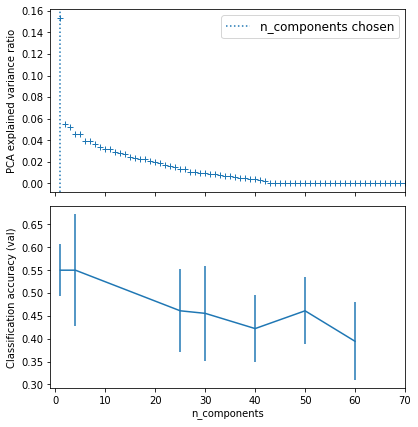

In [79]:
Y = []
a=0
for i in range(20):
  if a==0:
    for j in range(9):
      Y.append(a)
    a=1 
  if a==1:
    for j in range(9):
      Y.append(a)
    a=0
Y=pd.DataFrame(Y)
print(Y)




from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pca = PCA()
svc = SVC(kernel='rbf')
clf = OneVsRestClassifier(SVC(kernel='linear'))
rf = RandomForestClassifier(criterion='entropy')
mlp = MLPClassifier(activation='tanh')
pipe = Pipeline(steps=[('pca', pca),('rf',rf)])

#pc = pca.fit_transform(X)

X1=X
Y1=Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, random_state=42, test_size = 0.5)

param_grid = {
    'pca__n_components': [1,2,3,4,5,8,12,15,25,30,40,50,60,70],
    'rf__criterion':['gini','entropy'],
    'rf__n_estimators':[100,150,200],
    'rf__max_depth':[None,1,3,5,10],
    'rf__min_samples_split':[5,10],
    'rf__min_samples_leaf':[5,10],
   # 'mlp__hidden_layer_sizes':[(10,1),(10,5),(10,10),(10,100)],
    #'mlp__activation':['relu','identity',],
  #  'mlp__max_iter':[1.0, 10.0, 50, 100.0,],
  #  'mlp__alpha':[0.0001, 0.001, 0.01, 0.1],
}
search = RandomizedSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score_train=%0.3f):" % search.best_score_)
print(search.best_params_)
pred = search.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print("Best parameter (CV score_test=%0.3f):" % f1_score(y_test, pred)*100)
a=classification_report(y_test, pred)
print(a)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))


best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()





##Se hace lo mismo para el multiclase

(360, 1)
     0
0    0
1    1
2    2
3    3
4    4
..  ..
355  4
356  5
357  6
358  7
359  8

[360 rows x 1 columns]
Best parameter (CV score=0.272):
{'pca__n_components': 8}
20.555555555555554
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.37      0.65      0.47        20
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        23
           6       0.21      0.39      0.27        23
           7       0.00      0.00      0.00        13
           8       0.35      1.00      0.52        15

    accuracy                           0.21       180
   macro avg       0.10      0.23      0.14       180
weighted avg       0.10      0.21      0.13       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


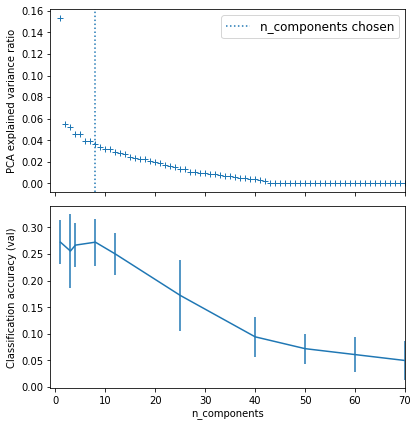

In [72]:
Y = []
for i in range(40):
  for j in range(9):
    Y.append(j)
Y =  np.array(Y)[:,np.newaxis]
print(Y.shape)
Y=pd.DataFrame(Y)
print(Y)


from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier


pca = PCA()
#pc = pca.fit_transform(X)

X2=X
Y2=Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, random_state=42, test_size = 0.5)

pca = PCA()
svc = SVC(kernel='rbf')
clf = OneVsRestClassifier(SVC(kernel='linear'))
rf = RandomForestClassifier(criterion='entropy')
mlp = MLPClassifier(activation='tanh')
pipe = Pipeline(steps=[('pca', pca),('clf',clf)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [1,2,3,4,5,8,12,15,25,30,40,50,60,70],
    #'rf__criterion':['gini','entropy'],
    #'rf__n_estimators':[100,150,200],
    #'rf__max_depth':[None,1,3,5,10],
    #'rf__min_samples_split':[5,10],
    #'rf__min_samples_leaf':[5,10],
   # 'mlp__hidden_layer_sizes':[(10,1),(10,5),(10,10),(10,100)],
    #'mlp__activation':['relu','identity',],
  #  'mlp__max_iter':[1.0, 10.0, 50, 100.0,],
  #  'mlp__alpha':[0.0001, 0.001, 0.01, 0.1],
}
search = RandomizedSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score_train=%0.3f):" % search.best_score_)
print(search.best_params_)
pred = search.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(f1_score(y_test, pred,average='micro')*100)
a=classification_report(y_test, pred)
print(a)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1,70)

plt.tight_layout()
plt.show()

#from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test, pred)
#print(cm)
#from sklearn.metrics import classification_report
#a=classification_report(y_test, pred)
#print(a)



# No se pudo optener mejor scoring de cladificación, se piensa que es debido a los datos replicados. 